# Object recognition using CNN as classifier

In this project a CNN was selected as the classifier, with a SVM as an addenum for comparison.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Section 1- Understanding and visualising the CIFAR-10 dataset

#### We can see the the dataset consists of 10 classes, with max values not exceeding 1.0.

In [ ]:
# Loading in the data
images = np.load('trnImage.npy')
labels = np.load('trnLabel.npy')
test_images = np.load('tstImage.npy')
test_labels = np.load('tstLabel.npy')

#print(labels.shape)
#print(test_labels.shape)
#print(test_images.shape)
#print(images.shape)

# Understanding the dataset
print(f'Number of features: {images.shape[1]}')
print(f'Number of classes: {len(np.unique(labels))}')

float_formatter = "{:.3f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
print(f'Minimums across the RGB channels: {images.min(2)}')
print(f'Maximums across the RGB channels: {images.max(2)}')

(32, 32, 3, 10000)
Number of features: 32
Number of classes: 10
Minimums across the RGB channels: [[[0.780 0.431 0.976 ... 0.063 0.600 0.973]
  [0.780 0.424 0.961 ... 0.078 0.902 0.965]
  [0.788 0.435 0.961 ... 0.047 0.859 0.969]
  ...
  [0.784 0.416 0.573 ... 0.035 0.875 0.659]
  [0.780 0.400 0.878 ... 0.047 0.894 0.643]
  [0.776 0.388 0.945 ... 0.086 0.780 0.635]]

 [[0.796 0.420 0.973 ... 0.059 0.725 0.984]
  [0.796 0.408 0.957 ... 0.031 0.980 0.980]
  [0.800 0.416 0.957 ... 0.063 0.933 0.980]
  ...
  [0.804 0.416 0.553 ... 0.063 0.941 0.675]
  [0.796 0.408 0.914 ... 0.027 0.957 0.659]
  [0.788 0.388 0.945 ... 0.059 0.906 0.639]]

 [[0.812 0.420 0.580 ... 0.024 0.706 0.976]
  [0.816 0.416 0.580 ... 0.027 0.965 0.973]
  [0.824 0.416 0.584 ... 0.051 0.922 0.973]
  ...
  [0.824 0.424 0.545 ... 0.043 0.906 0.678]
  [0.816 0.412 0.796 ... 0.020 0.902 0.667]
  [0.808 0.404 0.816 ... 0.016 0.855 0.643]]

 ...

 [[0.851 0.420 0.153 ... 0.035 0.416 0.129]
  [0.820 0.420 0.141 ... 0.090 0.537

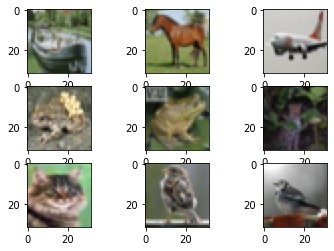

In [ ]:
# Plotting some images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(images[:, :, :, random.randrange(0, 10001)])
plt.show()

The extracted feature vector is of length 15876 per sample


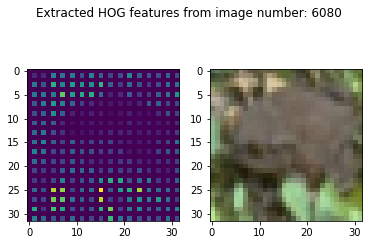

In [ ]:
# Extract features from a random image in the frog class
rand_int = random.randrange(6000, 7000)
rand_img= images[:, :, :, rand_int]
hog_feature, hog_image = skimage.feature.hog(rand_img, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)
print(f'The extracted feature vector is of length {hog_feature.shape[0]} per sample')

# Visualise a random cute frog
plt.figure()
plt.subplot(121)
plt.imshow(hog_image)
plt.subplot(122)
plt.imshow(rand_img)
plt.suptitle(f'Extracted HOG features from image number: {rand_int}')
plt.show(block=False)

# Section 2 - CNN approach

### 2.1 Preparing the dataset
#### As Tensorflow uses channels-last ordering, we have to transpose the arrays

In [ ]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Reshaping the labels to a 1D array
labels_flattened = np.reshape(labels, (10000,))
test_labels_flattened =np.reshape(test_labels, (1000,))

# Transposing the images to channels-last
trn_images = np.moveaxis(images, 3, 0)
tst_images = np.moveaxis(test_images, 3, 0)

### 2.2 Training the CNN

In [ ]:
# Shuffle the data before training
xTrn, xVal, yTrn, yVal = train_test_split(trn_images, labels_flattened, test_size=0.2)

cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), padding='valid'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), padding='valid'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=1e-8),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = cnn.fit(xTrn, yTrn, epochs=40, validation_data=(xVal, yVal), verbose=1)
cnn.summary()

Epoch 1/40
250/250 [==============================] - 15s 58ms/step - loss: 1.9899 - sparse_categorical_accuracy: 0.2591 - val_loss: 1.6635 - val_sparse_categorical_accuracy: 0.3880
Epoch 2/40
250/250 [==============================] - 15s 59ms/step - loss: 1.6633 - sparse_categorical_accuracy: 0.3851 - val_loss: 1.5220 - val_sparse_categorical_accuracy: 0.4500
Epoch 3/40
250/250 [==============================] - 14s 56ms/step - loss: 1.5414 - sparse_categorical_accuracy: 0.4389 - val_loss: 1.4349 - val_sparse_categorical_accuracy: 0.4845
Epoch 4/40
250/250 [==============================] - 14s 56ms/step - loss: 1.4503 - sparse_categorical_accuracy: 0.4695 - val_loss: 1.3560 - val_sparse_categorical_accuracy: 0.5140
Epoch 5/40
250/250 [==============================] - 14s 55ms/step - loss: 1.3912 - sparse_categorical_accuracy: 0.4922 - val_loss: 1.2719 - val_sparse_categorical_accuracy: 0.5525
Epoch 6/40
250/250 [==============================] - 14s 56ms/step - loss: 1.3352 - spars

### 2.3 Results

#### Accuracy and loss curves

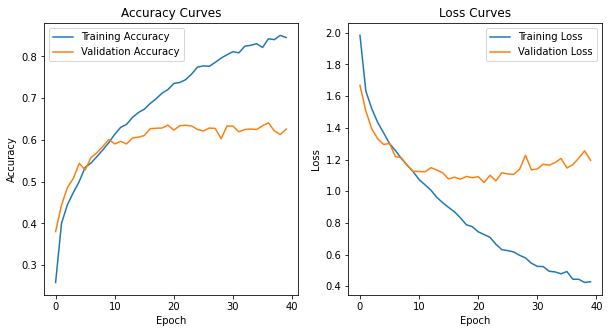

In [ ]:
# Plotting accuracy and loss curves
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

#### Prediction and confusion matrix

In [ ]:
from sklearn.metrics import classification_report
prediction_cnn = np.argmax(cnn.predict(tst_images), axis=1)
print("Classification report for CNN:")
print(classification_report(test_labels_flattened, prediction_cnn, target_names=class_names))

print("Confusion matrix for CNN:")
print(confusion_matrix(test_labels_flattened, prediction_cnn))

Classification report for CNN:
              precision    recall  f1-score   support

    airplane       0.66      0.62      0.64       100
  automobile       0.73      0.66      0.69       100
        bird       0.44      0.46      0.45       100
         cat       0.49      0.34      0.40       100
        deer       0.59      0.62      0.60       100
         dog       0.47      0.57      0.51       100
        frog       0.78      0.70      0.74       100
       horse       0.71      0.60      0.65       100
        ship       0.76      0.82      0.79       100
       truck       0.57      0.77      0.66       100

    accuracy                           0.62      1000
   macro avg       0.62      0.62      0.61      1000
weighted avg       0.62      0.62      0.61      1000

Confusion matrix for CNN:
[[62  5  8  2  0  2  1  2 11  7]
 [ 4 66  1  2  1  1  0  0  2 23]
 [ 9  1 46  6 10 13  6  5  2  2]
 [ 4  0 12 34  7 29  5  3  1  5]
 [ 3  1  7  6 62  7  4  5  1  4]
 [ 1  0  9 13 11 57

# Section 3 - (Supplementary) SVM approach

### 3.1 Preparing the dataset
#### We have to extract the feature vectors from the dataset of images

In [ ]:
#Extract HOG for the images
hog_trn_img_features = np.zeros(shape=(images.shape[3],14112))
hog_tst_img_features = np.zeros(shape=(test_images.shape[3],14112))

for i in range(images.shape[3]):
  image_i = images[:, :, :, i]
  hog_feature = skimage.feature.hog(image_i, orientations=8, pixels_per_cell=[2,2], cells_per_block=[3,3])
  hog_trn_img_features[i] = hog_feature

for i in range(test_images.shape[3]):
  image_i = test_images[:, :, :, i]
  hog_feature = skimage.feature.hog(image_i, orientations=8, pixels_per_cell=[2,2], cells_per_block=[3,3])
  hog_tst_img_features[i] = hog_feature

### 3.2 Training the model

In [ ]:
# Creating and training a SVM on training set
svc = SVC(kernel='poly', C=0.3)
trained_svm = svc.fit(hog_trn_img_features, labels_flattened)

### 3.3 Results

In [ ]:
print(f'Accuracy of model against test set: {trained_svm.score(hog_tst_img_features, test_labels_flattened)}')
print(f'Accuracy of model against training set: {trained_svm.score(hog_trn_img_features, labels_flattened)}')

predicion_svm = trained_svm.predict(hog_tst_img_features)
print("Classification report for SVM:")
print(classification_report(test_labels_flattened, predicion_svm, target_names=class_names))

print("Confusion matrix for SVM:")
print(confusion_matrix(test_labels_flattened, predicion_svm))

Accuracy of model against test set: 0.515
Accuracy of model against training set: 0.9643
Classification report for SVM:
              precision    recall  f1-score   support

    airplane       0.61      0.63      0.62       100
  automobile       0.62      0.56      0.59       100
        bird       0.34      0.25      0.29       100
         cat       0.39      0.42      0.40       100
        deer       0.39      0.51      0.44       100
         dog       0.45      0.46      0.45       100
        frog       0.55      0.63      0.59       100
       horse       0.68      0.53      0.60       100
        ship       0.51      0.60      0.55       100
       truck       0.71      0.56      0.63       100

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000

Confusion matrix for SVM:
[[63  1 10  3  4  1  2  1 14  1]
 [ 3 56  1  2  6  1  5  1 19  6]
 [10  1 25 10 13 15 14  4  5 